### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data and EDA

In [2]:
data = pd.read_csv("Wholesale customers data.csv")

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.shape

(440, 8)

In [5]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


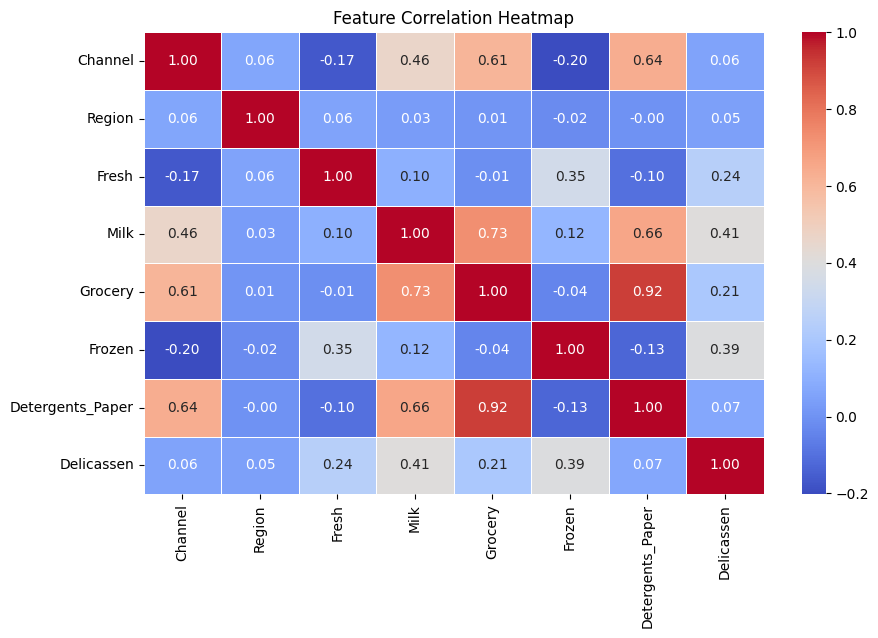

In [10]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the heatmap
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature Engineering

In [11]:
from sklearn.preprocessing import StandardScaler

# Remove categorical features
numeric_df = data.drop(columns=["Channel", "Region"])

# Normalize/Feature scaling the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Convert back to DataFrame for clarity
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)
scaled_df.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


Ensure equal feature contribution:
Different columns in the dataset have different scales (e.g., "Fresh" might range from 1000 to 100000, while "Milk" might be 500 to 50000).

Clustering algorithms like K-Means, DBSCAN, and GMM use distance metrics (e.g., Euclidean distance).

Features with larger values will dominate the distance calculations, leading to biased clustering results.

Solution: StandardScaler transforms all features to have mean = 0 and standard deviation = 1, ensuring fair contribution.


Before clustering, we prepared the data by removing non-numeric columns and standardizing the numerical values. This ensures that no single feature dominates the clustering process.

### Clustering 

### DBSCAN Clustering Algorithm

Unique clusters found: [-1  0]


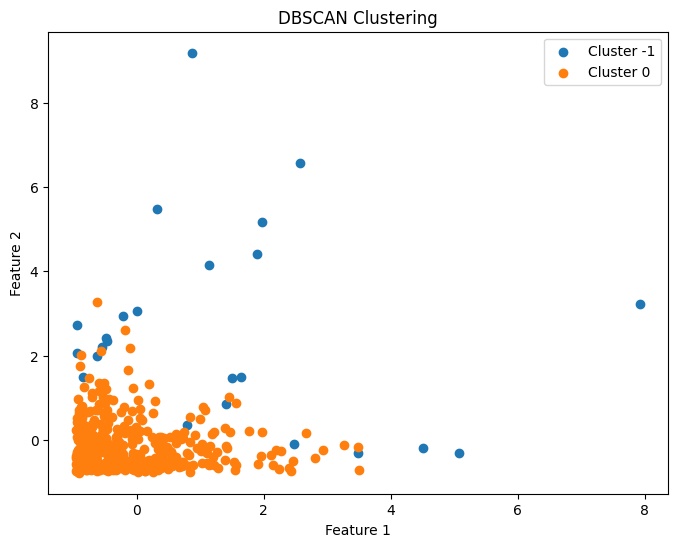

Silhouette Score: 0.6602
Adjusted Rand Index: 0.0425


In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Apply DBSCAN
dbscan_model = DBSCAN(eps=1.5, min_samples=5)  # You can tune eps and min_samples
dbscan_labels = dbscan_model.fit_predict(scaled_data)

# Add cluster labels to the dataset
data["Cluster"] = dbscan_labels

# Count unique clusters (-1 indicates noise points)
unique_clusters = np.unique(dbscan_labels)
print(f"Unique clusters found: {unique_clusters}")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in unique_clusters:
    cluster_points = scaled_data[dbscan_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate Clustering Performance
silhouette = silhouette_score(scaled_data, dbscan_labels)
print(f"Silhouette Score: {silhouette:.4f}")

# If ground truth labels existed, use Rand Index
# Assuming 'Channel' is the ground truth class (if applicable)
if "Channel" in data.columns:
    rand_index = adjusted_rand_score(data["Channel"], dbscan_labels)
    print(f"Adjusted Rand Index: {rand_index:.4f}")


We applied DBSCAN with eps=1.5 and min_samples=5, meaning that a point is considered part of a cluster if it has at least 5 neighbors within a radius of 1.5 units. Any points that don’t meet this condition are classified as noise (outliers).
DBSCAN found only one cluster (Cluster 0) and labeled some points as -1 (noise). This means that some points didn’t have enough nearby neighbors to form a dense group, so DBSCAN classified them as outliers.
Cluster 0 contains points that are grouped based on density.
Noise (-1) represents points that DBSCAN considers to be isolated and not belonging to any cluster.

The Silhouette Score tells us how well-separated the clusters are. A value close to 1 means well-defined clusters, 0 means overlapping clusters, and negative values indicate poor clustering. Since we got 0.6602, this suggests that the cluster is fairly well-separated from the noise points.
The cluster DBSCAN found is quite compact and well-separated.
However, since we only have one cluster and noise, it suggests that DBSCAN may not have found multiple meaningful groups.

ARI measures how well our clustering matches the true labels (Channel column, if applicable). A score near 1 means perfect clustering, 0 means random clustering, and negative means worse than random. Our score 0.0425 is very close to 0, meaning DBSCAN's clusters don’t strongly align with the true labels

DBSCAN identified one dense cluster (Cluster 0) and some noise points (-1). The Silhouette Score (0.6602) suggests the cluster is well-defined, but the Adjusted Rand Index (0.0425) shows that DBSCAN’s clusters do not strongly match the actual categories (Channel). This suggests that DBSCAN is grouping data based on density rather than predefined labels.

### OPTICS Clustering Algorithm

Unique clusters found: [-1  0  1]


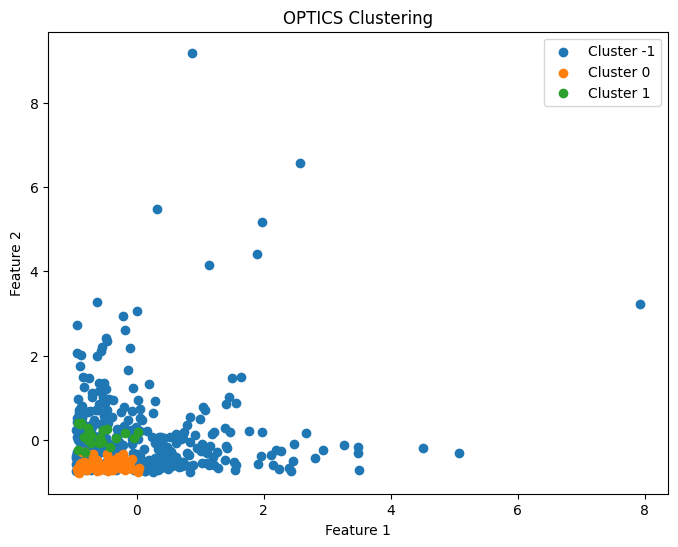

Silhouette Score: -0.1832
Adjusted Rand Index: -0.0152


In [13]:
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Apply OPTICS clustering
optics_model = OPTICS(min_samples=15, xi=0.02, min_cluster_size=0.05)
optics_labels = optics_model.fit_predict(scaled_df)


# Add cluster labels to dataset
data["Cluster"] = optics_labels

# Count unique clusters (-1 indicates noise points)
unique_clusters = np.unique(optics_labels)
print(f"Unique clusters found: {unique_clusters}")

# Plot OPTICS clusters
plt.figure(figsize=(8, 6))
for cluster in unique_clusters:
    cluster_points = scaled_data[optics_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.title("OPTICS Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate Clustering Performance
silhouette = silhouette_score(scaled_data, optics_labels)
print(f"Silhouette Score: {silhouette:.4f}")

# If ground truth labels exist, use Rand Index
if "Channel" in data.columns:
    rand_index = adjusted_rand_score(data["Channel"], optics_labels)
    print(f"Adjusted Rand Index: {rand_index:.4f}")


We applied OPTICS to the dataset, allowing it to detect groups of customers with similar spending habits. Unlike traditional clustering methods, OPTICS dynamically adjusts to different data densities, making it useful for identifying clusters of varying sizes.
What we found:

Unique clusters: [-1, 0, 1]

Silhouette Score: -0.1832

Adjusted Rand Index: -0.0152
OPTICS identified two clusters (Cluster 0 and Cluster 1) and labeled some points as -1 (noise), meaning those points did not belong to any cluster.

The Silhouette Score measures how well-defined the clusters are. A score close to 1 means well-separated clusters, 0 means overlapping clusters, and negative values indicate poor clustering. Since our score is -0.1832, it suggests that the clusters overlap significantly, meaning OPTICS may not have found clear groups in the data

ARI compares our clustering results to known categories (the Channel column, which contains actual customer types). A value near 1 means our clusters match the true labels well, while 0 or negative values indicate weak correlation. Our ARI of -0.0152 suggests that the OPTICS clusters do not align with the actual customer categories, meaning it might not be the best clustering method for this dataset.

Our OPTICS clustering analysis detected two customer groups but also classified many points as noise. However, the low Silhouette Score (-0.1832) suggests that the clusters are not well-separated, and the Adjusted Rand Index (-0.0152) shows that the clusters do not match the known customer categories (Channel). This suggests that OPTICS might not be the best algorithm for this dataset.